# Proyecto: Google Play Store Apps

## Integrantes
**Nombre:** Esneider Pantoja
**E-mail:** esneider.pantojad@utadeo.edu.co <br/>
*Nombre:* Marco Teran
*E-mail:* marco.tulio.teran@gmail.com <br/>
*Nombre:* Marco Teran
*E-mail:* marco.tulio.teran@gmail.com,

### Contexto del proyecto

Si bien muchos conjuntos de datos públicos (en Kaggle y similares) proporcionan datos de la App Store de Apple, no hay muchos conjuntos de datos equivalentes disponibles para las aplicaciones de Google Play Store en la web. Al profundizar, descubrí que la página de la App Store de iTunes implementa una estructura similar a un apéndice bien indexada para permitir un raspado web simple y fácil. Por otro lado, Google Play Store utiliza sofisticadas técnicas modernas (como la carga dinámica de páginas) utilizando JQuery, lo que hace que el scraping sea más desafiante

### Objetivo
Identificar el tipo de applicaciones mas demandas dentro de la plataforma Google Play.

#### Obtencion de los datos

Nos dirigimos a la pagina [kaggle: Google play store](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv).

Descargamos el conjunto de datos referentes al proyecto en la opcion **\"Download (2 MB)\"** la cual contiene los dataset del proyecto.

#### Conjunto de datos 

**googleplaystore.csv** (1.3 MB) Este archivo contiene los detalles de las aplicaciones en Google Play. con 13 características que describen una aplicación dada.<br/>
**googleplaystore_user_reviews.csv** (7.31 MB) Este archivo contiene las primeras 100 reseñas \"más relevantes\" de cada aplicación. Cada texto/comentario de revisión ha sido preprocesado y atribuido con 3 características: Sentimiento, Polaridad del sentimiento y Subjetividad del sentimiento.<br/>
**license.txt** (165 B) Este trabajo tiene la licencia Creative Commons Attribution 3.0 Unported License. Para ver una copia de esta licencia, visite [creativecommons](http://creativecommons.org/licenses/by/3.0/)

## Importacion de las librerias
**numpy** es una libreria que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.<br/>
**pandas** Es una liberia como extensión de NumPy para manipulación y análisis de datos, en particular ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.<br/>
**%matplotlib inline** permite fijar los gaficos dentro de una misma cuadricula.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Leer archivo
Con la funcion **pd.read_csv** leemos el archivo **\"googleplaystore.csv\"**

In [2]:
filePlayStore = pd.read_csv("./Archive/googleplaystore.csv",encoding='utf-8')

Con la funcion **Shape** nos indica el tamaño del archivo (Filas, Columnas)


In [3]:
filePlayStore.shape

(10841, 13)

para nuestro archivo nos indica un total de 10841 registros dividos en 13 columnas \"Caracteristicas\" diferentes para un total de 140933 entradas.<br/><br/>
Para examinar el contenido del archivo ejecutamos la funcion **head()** que nos indica los 5 primeros registros del dataSet.


In [4]:
filePlayStore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Para saber todas las columnas de nuestro archivo ejecutamos el siguiente atributo de dataset >> **colums** esto nos permitira conocer todos las caracteristicas de nuestro archivo.

In [5]:
print(filePlayStore.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


Para conocer el tipo de datos de las columnas ejecutamos **info()**

In [6]:
filePlayStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Eliminamos del conjunto de datos aquellas calificaciones que son mayores a 5

In [7]:
df= filePlayStore[filePlayStore['Rating'] <= 5]

Agrupamos nuestro conjunto de datos por \"Category\".

In [8]:
dfPlayStore_byCategory =df.groupby('Category')

Una vez agrupado nuestro conjunto de datos, generamos los datos estadisticos para aquellas categorias donde se pueda aplicar, esto se logra con **describe()**<br/>

Con **include = \'all\'** obtenemos el conjunto estadistico de todas las columnas<br/>
**np.number** incluye solo las columnas numericas del DataFrame


In [9]:
dfPlayStore_byCategory.describe()

Rating                                                 
                      count      mean       std  min    25%  50%    75%  max
Category                                                                    
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.4  4.700  5.0
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.3  4.600  4.9
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.3  4.575  4.9
BOOKS_AND_REFERENCE   178.0  4.346067  0.429046  2.7  4.100  4.5  4.600  5.0
BUSINESS              303.0  4.121452  0.624422  1.0  3.900  4.3  4.500  5.0
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.4  4.500  5.0
COMMUNICATION         328.0  4.158537  0.426192  1.0  4.000  4.3  4.400  5.0
DATING                195.0  3.970769  0.630510  1.0  3.700  4.1  4.400  5.0
EDUCATION             155.0  4.389032  0.251894  3.5  4.200  4.4  4.600  4.9
ENTERTAINMENT         149.0  4.126174  0.302556  3.0  3.900  4.2  4.300  4.7
EVENTS                 45.0  4.435556  0.419499  2.9  4.200  4.5  4.700  5.0
FAMILY               1747.0  4.192272  0.508026  1.0  4.000  4.3  4.500  5.0
FINANCE               323.0  4.131889  0.642108  1.0  4.000  4.3  4.500  5.0
FOOD_AND_DRINK        109.0  4.166972  0.548070  1.7  4.000  4.3  4.500  5.0
GAME                 1097.0  4.286326  0.365375  1.0  4.100  4.4  4.500  5.0
HEALTH_AND_FITNESS    297.0  4.277104  0.617822  1.4  4.100  4.5  4.600  5.0
HOUSE_AND_HOME         76.0  4.197368  0.368411  2.8  4.000  4.3  4.500  4.8
LIBRARIES_AND_DEMO     65.0  4.178462  0.378522  3.1  4.000  4.2  4.400  5.0
LIFESTYLE             314.0  4.094904  0.693907  1.5  3.800  4.2  4.600  5.0
MAPS_AND_NAVIGATION   124.0  4.051613  0.519926  1.9  3.775  4.2  4.400  4.9
MEDICAL               350.0  4.189143  0.663581  1.0  4.000  4.3  4.600  5.0
NEWS_AND_MAGAZINES    233.0  4.132189  0.536707  1.7  3.900  4.2  4.500  5.0
PARENTING              50.0  4.300000  0.517845  2.0  4.100  4.4  4.675  5.0
PERSONALIZATION       314.0  4.335987  0.352732  2.5  4.200  4.4  4.600  5.0
PHOTOGRAPHY           317.0  4.192114  0.462896  2.0  4.000  4.3  4.500  5.0
PRODUCTIVITY          351.0  4.211396  0.504931  1.0  4.100  4.3  4.500  5.0
SHOPPING              238.0  4.259664  0.404577  1.6  4.100  4.3  4.500  5.0
SOCIAL                259.0  4.255598  0.413809  1.9  4.100  4.3  4.500  5.0
SPORTS                319.0  4.223511  0.427857  1.5  4.100  4.3  4.500  5.0
TOOLS                 734.0  4.047411  0.616143  1.0  3.800  4.2  4.400  5.0
TRAVEL_AND_LOCAL      226.0  4.109292  0.504691  2.2  3.900  4.3  4.400  5.0
VIDEO_PLAYERS         160.0  4.063750  0.551098  1.8  3.800  4.2  4.400  4.9
WEATHER                75.0  4.244000  0.331353  3.3  4.050  4.3  4.500  4.8

## Visualizacion de los datos



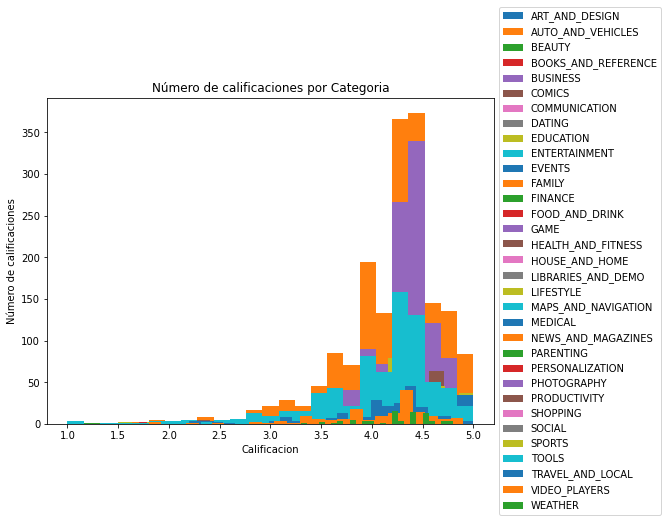

In [10]:
# Indicamos el tamaño del grafico
plt.figure(figsize=(8,6))
# Generamos un grafico Hist apartir de la columna 'Rating'
dfPlayStore_byCategory['Rating'].plot.hist(bins=25,zorder=5, rwidth=2)
# Asignamos el titulo del grafico
plt.title('Número de calificaciones por Categoria')
plt.xlabel('Calificacion')
plt.ylabel('Número de calificaciones')
# Indicamos los label de las categorias por fuera del grafico.
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### Top categorias mas instaladas o descargadas

In [20]:
# Se agrupa por categoria y se saca el estadistico de instalaciones
#filePlayStore.Installs = filePlayStore.Installs.str.replace('+' , '')
#filePlayStore.Installs = filePlayStore.Installs.str.replace(',' , '')

#filePlayStore.Installs = filePlayStore.Installs.astype('float').astype('int')

#df1 = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

#df1.Installs = df1.Installs/1000000000# converting into billions
#df2 = df1.head(15)
#plt.figure(figsize = (14,10))
#sns.set_context("talk")
#sns.set_style("darkgrid")

#ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
#ax.set_xlabel('No. of Installations in Billions')
##ax.set_ylabel('')
#ax.set_title("Most Popular Categories in Play Store", size = 20)


### Se indica aquellas applicaciones que tienen un 5 como puntaje

In [ ]:
calificacion5 = filePlayStore.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()
topApps = calificacion5[calificacion5.Rating == 5.0]
topApps

,Category,Installs,App,Rating
739,BUSINESS,5+,EB Cash Collections,5.0
740,SOCIAL,50+,UP EB Bill Payment & Details,5.0
741,SOCIAL,10+,DN Blog,5.0
742,SOCIAL,5+,CB Heroes,5.0
743,GAME,50+,Axe Champs! Wars,5.0
...,...,...,...,...
1003,GAME,10+,211:CK,5.0
1004,DATING,500+,Spine- The dating app,5.0
1005,DATING,100+,Online Girls Chat Group,5.0
1006,TOOLS,100+,BK Formula Calculator,5.0


### Selecionamos el número de applicaciones Gratis y de Paga.

In [19]:
print("Aplicaciones Libres ó Gratis: ",len(filePlayStore[filePlayStore['Type'] == "Free"]))
print("Applicaciones de paga: ",len(filePlayStore[filePlayStore['Type'] == "Paid"]))

Aplicaciones Libres ó Gratis:  10039
Applicaciones de paga:  800


In [18]:
# Falta revisar
#plt.figure(figsize=(10,10))
#explode=[0.1,0]
#filePlayStore['Type'].value_counts().plot.pie(autopct="%2i%%",explode=explode)
#plt.legend()
#plt.show()

### Filtramos por el tipo de personas que califican las apps

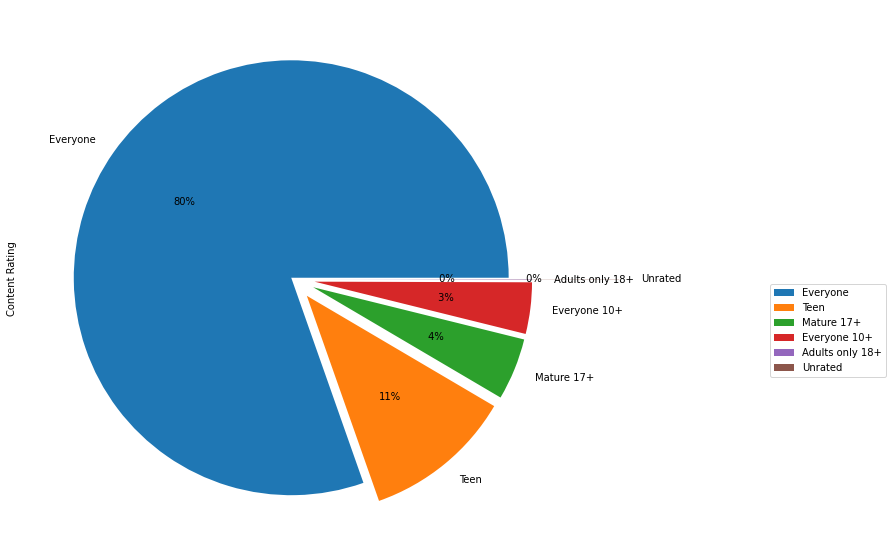

In [14]:
#  Calificacion de contenido 
plt.figure(figsize=(10,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
filePlayStore['Content Rating'].value_counts().plot.pie(autopct="%2i%%",explode=explode)
plt.legend( bbox_to_anchor=(1.6, 0.5))
plt.show()

##  Apps Por genero

In [16]:
generos = filePlayStore.Genres.value_counts().head(10)
generos

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


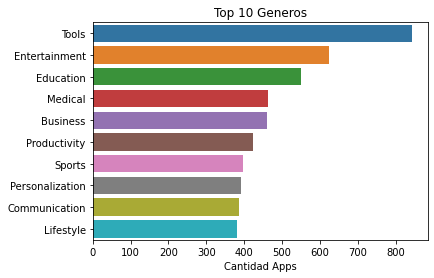

In [17]:
sns.barplot(generos, generos.index)

plt.title('Top 10 Generos')
plt.ylabel(None);

plt.xlabel('Cantidad Apps');